# Machine learning

Machine learning, repaso, interpretaciones que antes solo los humanos podian manejar; texto a mano, predicciones, video,etc

scikit-learn (libreria) va a ser nuestra principal libreria de ML, tiene muchos modelos internos ya hechos de ML

scikit-learn nos facilita las mates sin tener que entenderlas yo no tengo que sabes como funciona un motor para conducirç


---------

Por ahora nuestro esquema mental de ML es este:::

## ML supervisado con etiquetas

    -clasificacion separada por estructuras
    -regresion(saca un valor aproximado)

## ML no supervisado (deteca comandos)
    

## 15.2- Caso de Estudio - Clasificación

tratar de hacer mediante una etiqueta escrita a mano que la maquina sepa hacia odnde tiene qe ir el correo (Clasificacion)
### K-nearest Neighbors

El algoritmo K-nearest Neighbors clasifica un elemento desconocido segun los elementos que qtiene mas cerca

KNN para sk learn es un alrgoritmo de tipo estimador

1.numero de vecinos (n_neighbours):
    es el principal valor que tu decides.
    cuantos mas vecinos uses mas suave sera la clasificacion
2. otros parametros
    el programa ajusta algunos automaitcamente pero puedes modificarlos mas adelante para mejorar el rendimiento.

### hiperparametros
El numero de vecinos son hiperparametros es decir valoers que decides anes de entrenar al modelo
al principio puedes dejar los valores por defecto pero lo ideal es probar diferentes combinaciones para encontrar la que mejor funcione

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [1]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Checa el target de tu nuevo objeto digitos

In [4]:
digits.target[::100] #una muestra cada 100 imagenes del valor en digito

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Ahora prueba revisando la forma del arreglo digitos

In [5]:
digits.data.shape # estructura de datos iamgenes digitos

(1797, 64)

Y la forma del arreglo target

In [6]:
digits.target.shape #la forma del vector de etiquetas una etiquedta por imagen

(1797,)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [7]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [8]:
digits.data[15] # version formateada a 1 x 64

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

porque queremos 1x64

cada imagen del dataset digits del skt learn es de 8x8 pixeles.
en lugar de guardar la imagen como una matriz 8x8 eld ataset aplana para representar cada imagen como un vector de caracteristicas 8x8=64
esto permite que los modelos de machine learning (como los clasificadores de sklearn ) puedan trabajar con los datos, ya que la mayoria de los algoritmos esperan vectores unidimensionales de caracteristicas numericas

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [ ]:
import matplotlib.pyplot as plt

Ahor adibuja una cuadricula para lograr tu cometido

In [ ]:
figure, axes= plt.subplots(nrows=4,ncols=6,figsize=(6,4))

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

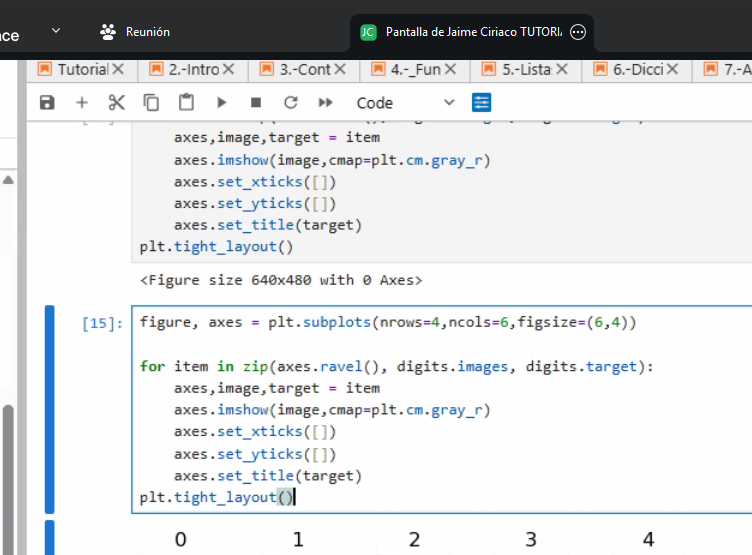

In [ ]:
for item in zip(axes.ravel(), digits.images,digits.target):
    axes
    

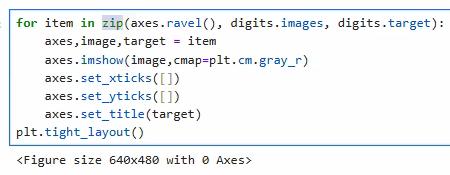

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

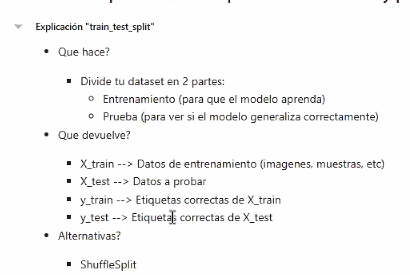

###### explicacion "train_text_split"
que haces 
dicide tu dataset en 2 partes
entrenamiento
prueba

que devuelve 
x_train datos de entrenamiento
x_text


Y a continuación generar el split entre test y train

In [ ]:
from sklearn.model_selection import train_test_split

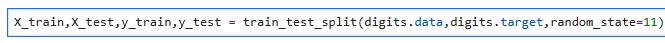

Veamos las shapes de nuestros sets para X (muestras)

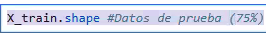

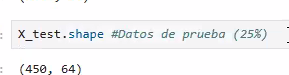

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

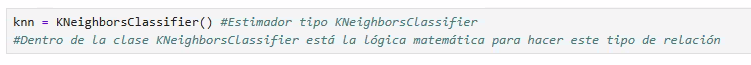

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

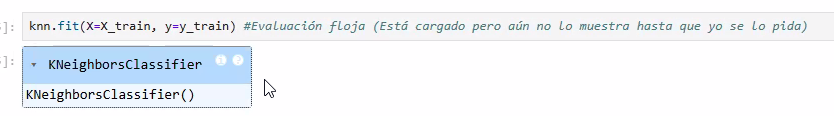

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

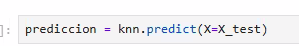

Arma un objeto llamado esperado

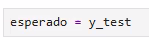

Comparemos predicho vs esperado

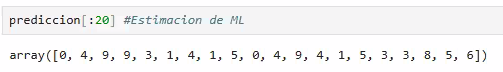

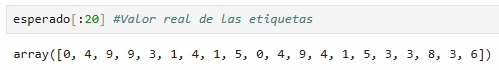

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [ ]:
incorrectas_list =[(p,e) for (p,e) in zip(prediccion, esperado) if p!=e]
incorrectas_list

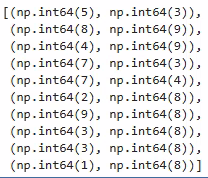

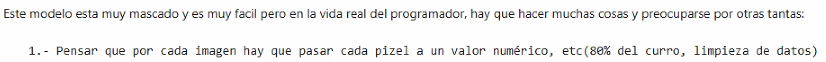


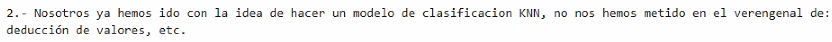

## 15.3 Clasificación parte 2 - Dataset de digitos ((intentar evaluar si nuestro modelo es bueno o es malo))

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

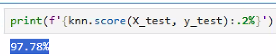

Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

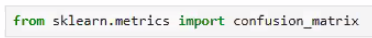

Y ahora armar tu matriz de confusion

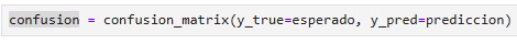

Checa los resultados

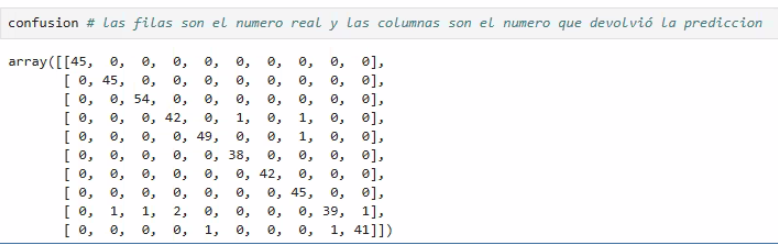

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [ ]:
from sklearn.metrics import classification_report


Y ahora crea una comprension de lista que nos de los nombres de los digitos

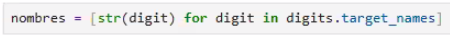

Y termina haciendo tu reporte de clasificacion

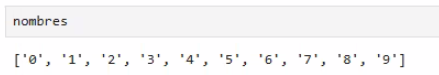

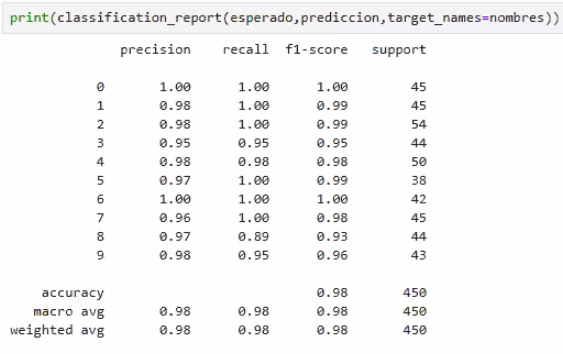

Y ahora ahremos un heatmap con la matriz de confusion

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

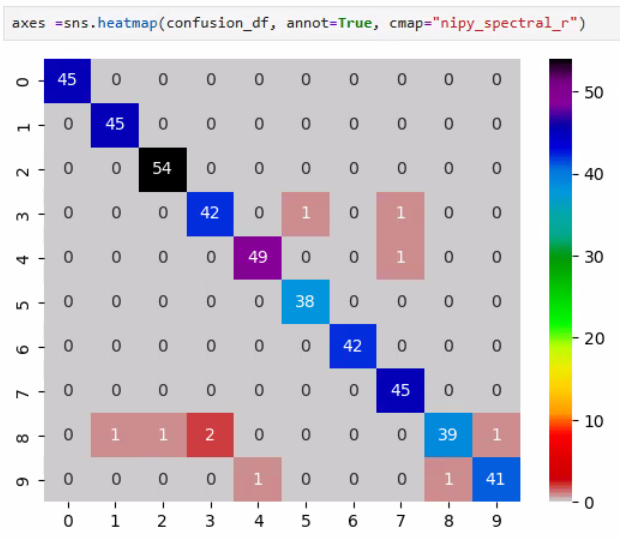

### 15.3.2.- K-Fold Validación Cruzada

La validacion cruzada con K-Fold es una tecnica que se usa para comprobar que tan bien un modelo de ML aprende realmente y no solo memoriza los datos (lo que se llama overfitting)

En lugar de entrenar el modelo una sola vez con unos datos y probarlo con otros la validacion K-Fold divide todo el conjunto de datos en K partes iguales, llamadas folds, pliegues.

luego el modelo se entrena y evalá K veces:
    en cada una de estas veces, se usara una parte diferente como conjunto de prueba
    y las K-1 partes restantes se usan para entrenar

Asi cada parte del dataset se usa una vez para probar y varias veces para entrenar, lo que da una evaluacion mucho mas equilibrada.

Al final, se calculan las métricas (la exactitud con accuracy) de cada una de las K pruebas y se hace el promedio. Ese valor representa el valor real del modelo, porque tiene en cuenta su comportamiento en distintas divisiones del mismo conjunto de datos.

Resumen:
* "K" es el nº de divisiones o grupos
* "Fold" significa cada bloque o pliegue de datos
* Sirve para evaluar modelos de manera mas fiable y evitar conclusiones erroneas por haber tenido una particion de datos "con suerte" o "mala"

Importa kfold desde sklearn.modelselection

In [ ]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [ ]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
# n_splits, es el numero de veces que voy a entrenar 
#random_state = semilla
#shuffle = mezcla los datos para dar mas riguroridad al algoritmo, que no lo haga por suerte vamos

Ahora importa cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [ ]:
puntuacion = cross_val_score(estimator = knn, X=digits.data, y = digits.target, cv = kfold)
# estimador = knn define que tipo de clasificacion se va usar
#cv toma los datos del kfold para ver cuantas veces entrenara el modelo y la naturaleza del randomizer

Checa los resultados

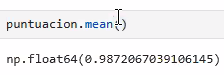

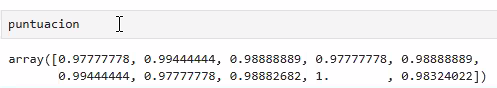

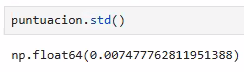

esto demuestra que cuantos mas datos usemos para analisis de datos(KFold usa todos y varias veces) mejor es la aproximacion o deduccion del programa(en este caso KNN que antes solo usaba un 75% para entrenar)

### 15.3.3.- Varios Modelos hasta dar con el bueno ((Vamos a probar diferentes estimadores hasta ver cual funiona mejor para los datos que tenemos))

Importa SVC y GaussianNB

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [ ]:
estimadores = {"KNeighboursClassifier":knn, "SVC":SVC(gamma="scale"),"GaussianNB":GaussianNB()}

Ejecuta los modelos con un for

In [ ]:
for nombreestimador, objetoestimador in estimadores.items():
    kfold = KFold(n_splits=10,random_state=11,shuffle=True)
    puntuacion = cross_val_score(estimador = objetoestimador,X=digits.data, y = digits.target ,cv=kfold)
    print(f'{nombreestimador:>20}' + f'Puntuacion Promedio {puntuacion.mean():.2%}' + f'Desviacion estandar = {puntuacion.std():.2%}')

##### Codigo y resultado prof
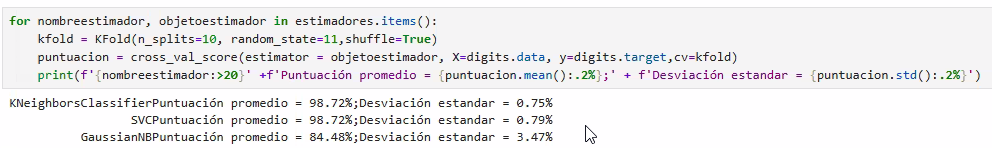

Esto significa que; KNN y SCV son buenos estimadores para el dataset de digits, pero GaussianNB es mala, entonces solo proseguiremos al siguiente punto con las buenas

### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [ ]:
for k in range(1,20,2):
    kfold = KFold(n_splits=10, random_state=11,shuffle=True)
    knn = KNeighboursClassifier(n_neighbours=k) #Nº de vecinos que usara a la hora de clasificar un valor
    puntuacion = cross_val_score(estimador = knn,X=digits.data, y = digits.target ,cv=kfold)
    print(f'k={k:>20}' + f'Puntuacion Promedio {puntuacion.mean():.2%}' + f'Desviacion estandar = {puntuacion.std():.2%}')

Codigo de profesor
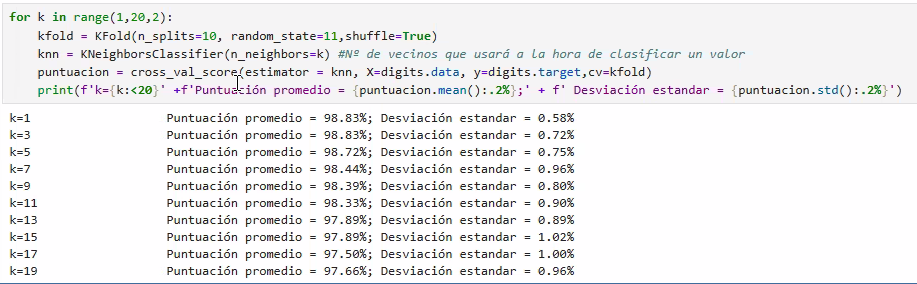

## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [ ]:
#import pandas as pd

In [ ]:
kchouse = pd.read_csv("kc_house_data.csv")

Dale nombre a las columnas del dataframe

In [ ]:
kchouse.columns=["Areaft","PrecioUSD"]

Muestra los primeros 20 datos

In [ ]:
kchouse.head(20)

usemos train test split para training y pruebas

In [ ]:
# como trabajamos con dataframes y sus columnas con series el programa no lo entiende y se lo tenemos que dar como arreglos bidimensionales

#implementar la libreria train_test_split

X_train,Xtest,y_train,y_test = train_test_split(kchouse.Areaft.values.reshape(-1,1), kchouse.PrecioUSD,values,random_state=11)

codigo prof
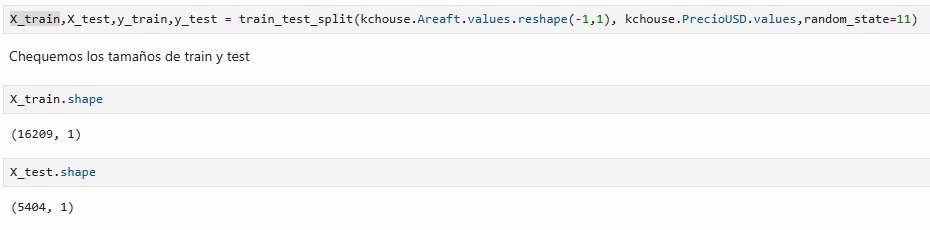

Chequemos los tamaños de train y test

importa LinearRegression de sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [ ]:
reglin = LinearRegression()

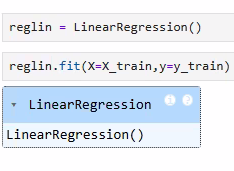

Obten el Coef y el INtercept

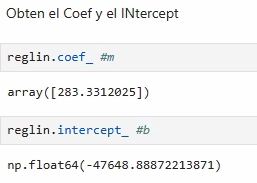

Probemos el modelo, crea los objetos prediccion y esperado

In [ ]:
prediccion = reglin.predict(X_test)

In [ ]:
esperado = y_test

Arma un ciclo que muestre prediccion vs esperado para los datos de 100 en 100

In [ ]:
#mostrar dos listas con el mismo numero de indices que me muestre un dato cada cien

for p,e in zip(prediccion[::100]), esperado[::100]:
    print(f'Prediccion: {p:.2f}, Esperado:{e:.2f}')
    

cod prof
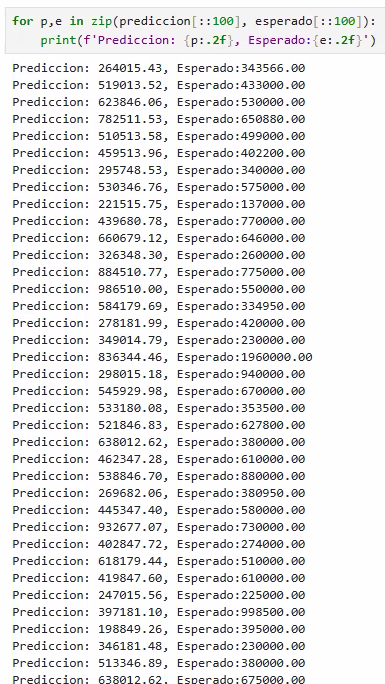

Vamos a predecir precios de casas usando area en sqft

In [ ]:
y mx +b
# pseudo codigo creas variable
#por el valor que quiera producir un valor
#sumado por el punto de interseccion del eje y
#multiplicas coeficiente de la recta
predice (lambda x: reglin.coef_*x+reglin.intercept_)

In [ ]:
predice(num_indice)# 770 Indice 2

In [ ]:
predice(num_indice)# 1160 Indice 11

Y ahora visaulizemos la regresion lineal con seaborn

In [ ]:
import seaborn as sns

axes = sns.scatterplot(data=kchouse, x="Areaft", y = "PrecioUSD", hue "PrecioUSD", palette ="winter",legend=False)
import numpy as np

x = np.array([min(kchouse.Areaft.values),max(kchouse.Areaft.values)])
y = predice(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y,color="red")

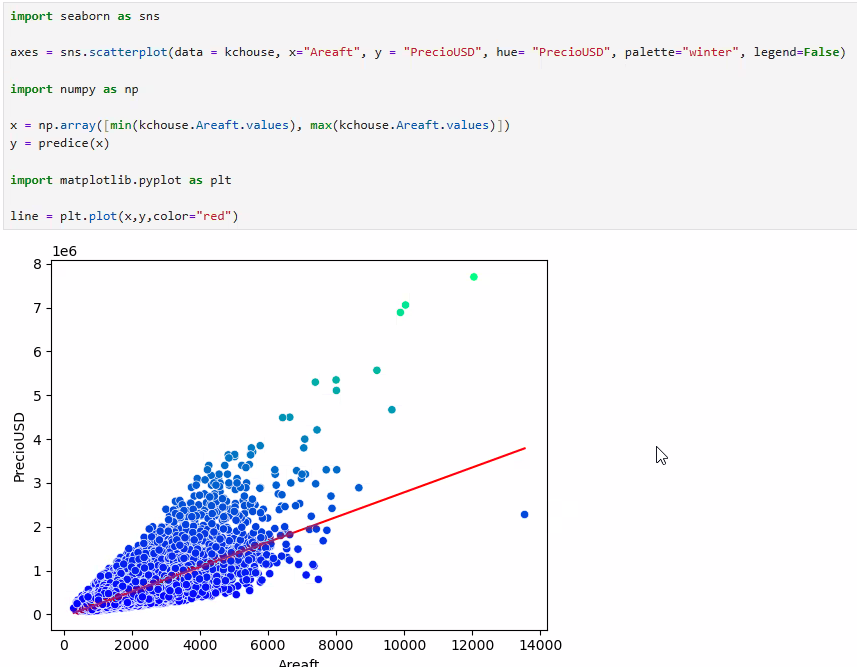

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing() # este es el dataset de train.csv uno muy famoso de datos de las casas de california del 1990 integrado como libreria en sklearn

In [ ]:
print(california.DESCR)

In [ ]:
california.data.shape

In [ ]:
california.target.shape

In [ ]:
california.feature_names # titulo de las columnas

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [ ]:
#import pandas as pd

In [ ]:
pd.set_option("display.precision",4)

In [ ]:
pd.set_option("display.max_columns",9)

In [ ]:
pd.set_option("display.width",None)

Carga los datos de california en un dataframe

In [ ]:
california_df = pd.DataFrame(california.data, columns =california.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [ ]:
california_df["Target"] = california.target

Checa el head de california

In [ ]:
california_df.head()

Hagamos un describe para ver que onda

In [ ]:
california_df.describe()

### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [ ]:
muestra_cal_df = california_df.sample(frac = 0.1,random_state=17) #coje una muestra de valores aleatorios de california_df 

Importa Matplotlib

In [ ]:
import matplotlib.pyplot as plt

IMporta Seaborn

In [ ]:
import seaborn as sns

Cambia la fuente de seaborn

In [ ]:
sns.set(font_scale = 2)

Ponlo tipo Whitegrid

In [ ]:
sns.set_style("whitegrid")

Arma graficas de precio vs cada feature

In [ ]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data= muestra_cal_df,x=feature,y="Target",hue="Target",palette="cool",legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [ ]:
#from sklearn.model_selection import train_test_split

Arma tu train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(cf.data, cf.target, random_state = 11)

Checa las figura de train

In [ ]:
X_train.shape

Checa la figura de test

In [ ]:
X_test.shape

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

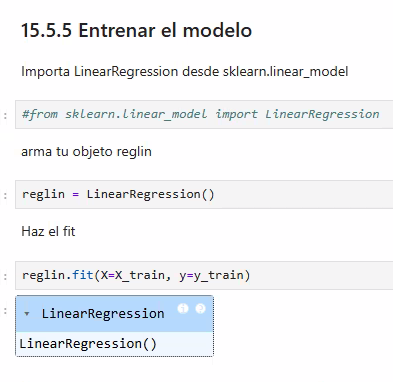

arma tu objeto reglin

In [ ]:
reglin = LinearRegression()

Haz el fit

In [ ]:
reglin.fit(X=X_train, y =y_train)

Arma tu for para enumerar todos los coeficientes

In [ ]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}:{reglin.coef_[i]}')

Obten el intercept

In [ ]:
reglin.intercept_

### 15.5.6  Probar el modelo

Arma tu prediccion

In [ ]:
prediccion= reglin.predict(X_test)

Arma tu lista de valores esperados

In [ ]:
esperados = y_test

vamos a ver las primeras 5 predicciones

In [ ]:
prediccion[:5]

vs los primeros 5 valores esperados

In [ ]:
esperados[:5]

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [ ]:
df = pd.DataFrame()

Agregale una columna con los precios esperados

In [ ]:
df["Esperados"] = pd.Series(esperados)

Otra con los precios predichos

In [ ]:
df["Predecidos"] = pd.Series(prediccion)

Arma una figura de plt

Metele un scatterplot de seaborn

In [ ]:
figura = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df,x="Esperados", y="Predecidos",hue = "Predecidos",palette="cool",legend=False )
start = min(esperados.min(),prediccion.min())
end = max(esperados.max(),prediccion.max())

line = plt.plot([start,end],[start,end], "k--")

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [ ]:
from sklearn import metrics

Saca el r2

In [ ]:
metrics.r2_score(esperados, prediccion)#60% (ESTA MUY BIEn)
# dato = 1 comparacion perfecta
# dato = 0 comparacion nula
# dato = -1 comparacion perfecta inversa

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [ ]:
metrics.mean_squared_error(esperados,prediccion) #cuanto mas se acerque a 0 menos errores hay

### 15.5.9  Escoger el mejor modelo

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [ ]:
estimadores ={"Regin":LinearRegression(), "ElasticNet":ElasticNet(), "Lasso":Lasso(), "Ridge":Ridge()}

In [ ]:
# from sklearn.model_selection import KFold, cross_val_score

In [ ]:
for promest, objest in estimadores.items():
    kfold = KFold(n_splits=10,random_state=11,shuffle=True)
    puntuajes = cross_val_score(estimador=objest , X= california.data, y =california.target, cv = kfold, scoring "r2")
    print(f'{promest:>16}:'+ f'Promedio de puntuajes R2= {puntuajes.mean():.3f}:')

codigo prof
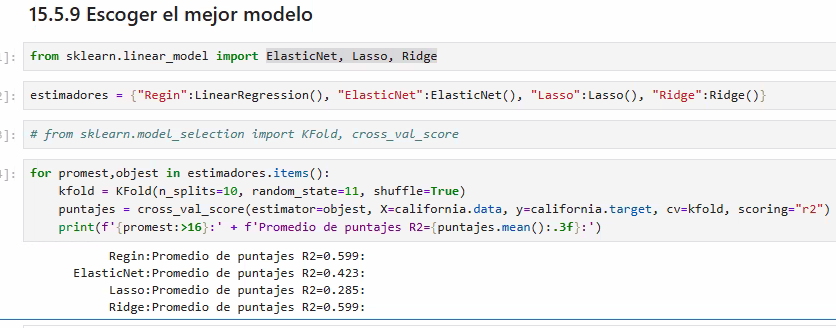

## 15.6 Aprendizaje no supervisado parte 1 ((con lo del principio (nºdibujado-valor numerico) va a buscar la manera de simplificar las dimensiones de un 8x8 a un nx2))

Importa load_digits (de nuevo) desde sklearn.datasets

In [ ]:
from sklearn.datasets import load_digits

arma tu objeto load_digits

Importa TSNE desde sklearn.manifold(T-distributed stochastic neigbor embedding) #estimador para modificar algo a las dimensiones que les pedimos (hay otro como el PCA(principal component analysis) que veremos mas adelante)

In [ ]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [ ]:
tsne = TSNE(n_components = 2, random_state=11)

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [ ]:
datosreducidos = tsne.fit_transform(digits.data)

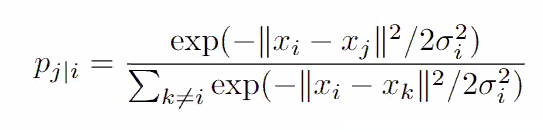

Checa la forma de tus datos

In [ ]:
datosreducidos.shape

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dots = plt.scatter(datosreducidos[:,0],datosreducidos[:,1],c="black")# si puedes copia una explicaciones que habia en el clase, en la clase grabada seguro aparece

Y el sacatter

Ahora haz el scatter con colores diferentes

In [ ]:
dots = plt.scatter(datosreducidos[:,0],datosreducidos[:,1],c= digits.target,cmap=plt.cm.get_cmap("nipy_spectral_r",10))
colorbar=plt.colorbar(dots)

#hemos hecho clustering(agrupacion de cosas parecidas)

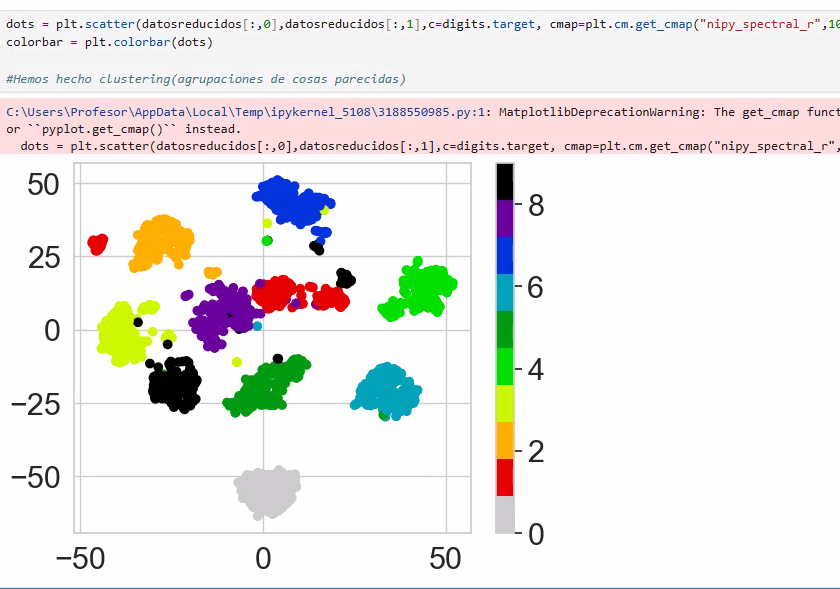

## 15.7 Aprendizaje no supervisado parte 2 ((clasificar sin etiquetas uo pongo un valor parecido a otro donde se que coincide con una agrupacion ))

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

In [ ]:
from sklearn.datasets import load_iris

Arma un objeto iris de load_iris

In [ ]:
iris = load_iris()

Veamos la descripción del dataset

In [ ]:
print(iris.DESCR)

Veamos la figura del iris.data

In [ ]:
iris.data

La figura del iris.shape

In [ ]:
iris.shape

Conozcamos los posibles targets con target_names

In [ ]:
iris.target_names

Y también los feature names

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

In [ ]:
import pandas as pd

Le decimos que maximo 5 columans

In [ ]:
pd.set_option("display.max_columns",5)

Y sin display width

In [ ]:
pd.set_option("display.width",None)

Cargamos un dataframe con iris.data

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

Y le pegamos las especies que vienen de iris.target_names

In [ ]:
iris_df["especie"] = [iris.target_names[i] for i in iris.target]

Checa el head del dataset

In [ ]:
iris_df.head()

Pon la precision de pandas a 2 decimales

In [ ]:
iris_df["especie"].describe()

Armate un describe del dataframe

Y un describe de la columna de species solamente

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [11]:
import seaborn as sns

Cambia la fuente a 1.1

In [12]:
sns.set(font_scale= 1.1)

Ponlo estilo whitegrid

In [13]:
sns.set_style("whitegrid")

Arma tu pairplot en un objeto llamado cuadricula

In [14]:
cuadriculo_pairplot = sns.pairplot(data = iris_df, vars = iris_df.columns[0:4], hue = "especie") # comprension de grafica a 4 dimensiones

NameError: name 'iris_df' is not defined

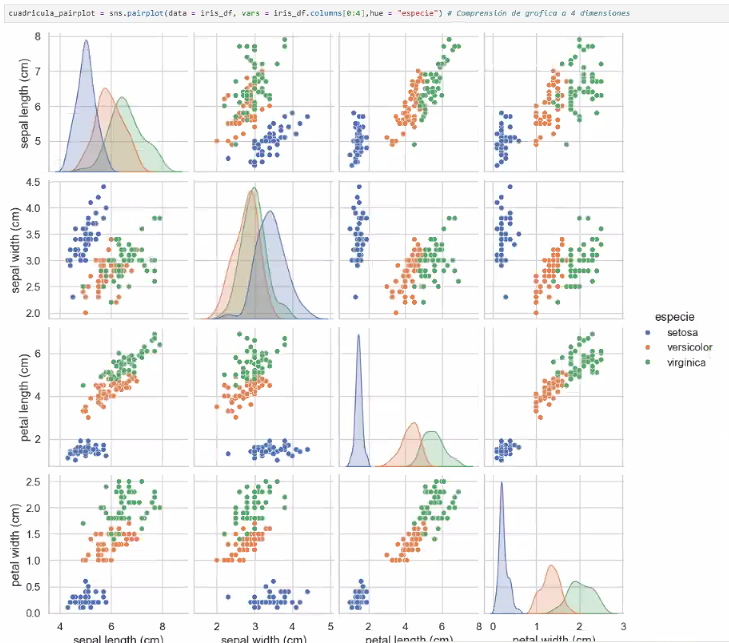

con esto puedo ver que a la hora de analizar la etiqueta azul va a ser mas facil de clasificar or que hay poco overlap con las otras especies

Ahora mostremos el pairplot en un solo color

In [15]:
cuadriculo_pairplot = sns.pairplot(data = iris_df, vars = iris_df.columns[0:4] 
                                   # si lo vemos a un unico color vemos que solo se forman 2 grupos o clusters lo cual nos da la misma conclusion de aproximacion que el anterior ejemplo

_IncompleteInputError: incomplete input (693799554.py, line 2)

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

In [16]:
from sklearn.cluster import KMeans

Ahora creamos el estimador

In [18]:
kmeans = KMeans(n_clusters=3, random_state=11) # el numero de grupos que se qeu hay con anterioridad

Entrenamos el modelo con el metodo .fit

In [19]:
kmeans.fit(iris.data) # entrenar el modelo

NameError: name 'iris' is not defined

Imprimimos los primeros 50 resultados

In [20]:
print(kmeans.labels_[:50])

AttributeError: 'KMeans' object has no attribute 'labels_'

Ahora los segundos 50

In [ ]:
print(kmeans.labels_[50:100])

Y los ultimos 50

In [21]:
print(kmeans.labels_[100:])

AttributeError: 'KMeans' object has no attribute 'labels_'

### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

In [22]:
from sklearn.decomposition import PCA

Arma tu estimador PCA

In [ ]:
pca = PCA(n_components=2, random_state=11)

Arma el fit

In [ ]:
pca.fit(iris.data)

Y luego transforma los datos usando transform

In [24]:
iris_pca = pca.transform(iris.data)

NameError: name 'pca' is not defined

checa la figura de los datos que devolvió

In [26]:
#pca.transform?
iris_pca.shape

NameError: name 'iris_pca' is not defined

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

In [27]:
iris_pca_df = pd.DataFrame(iris_pca, columns=["Componente1","Componente2"])

NameError: name 'pd' is not defined

pegale la especie a ese dataframe

In [ ]:
iris_pca_df["especie"] = iris_df.especie

arma un scatterplot en seaborn

In [ ]:
axes = sns.scatterplot(data = iris_pca_df, x ="Componente1", y= "Componente2",hue"especie",legend ="Brief",palette="cool")

Vamos armando un objeto centroide para mostrar en seaborn

In [28]:
iris_centros = pca.transform(kmeans.cluster_centers_) #los centros de los clusters

NameError: name 'pca' is not defined

importa matplotlib

In [29]:
import matplotlib.pyplot as plt

Muestra los scatter

In [ ]:
axes = sns.scatterplot(data = iris_pca_df, x ="Componente1", y= "Componente2",hue"especie",legend ="Brief",palette="cool")

dots = plt.scatter(iris_centros[:,0],iris_centros[:,1],s=100,c="k") #s es el tamaño "c" es el color

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

In [30]:
from sklearn.cluster import DBSCAN, MeanShift,SpectralBiclustering,AgglomerativeClustering

Arma un diccionario con los estimadores

In [ ]:
estimadores = {"KMeans":kmeans,"DBSCAN":DBSCAN(),"MeanShift":MeanShift(),"SpectralBiclustering":SpectralBiclustering(n_clusters = 3),"AgglomerativeClustering":AgglomerativeClustering(n_clusters=3)}


importa Numpy as np

In [ ]:
import numpy as np

arma el for que va a hacer los estimadores

In [ ]:
for nombre, estimador in estimadores.items():
    estimador.fit(iris.data)
    print(f'\n{nombre}:')
    for i in range(0,101,50):
        etiquetas, cuentas = np.unique(estimador.labels_[i:i+50], return_counts= True)
        print(f'{i}-{i+50}:')
        for etiqueta, cuenta in zip(etiquetas, cuentas):
            print(f'etiqueta={etiqueta}, cuenta ={cuenta}')

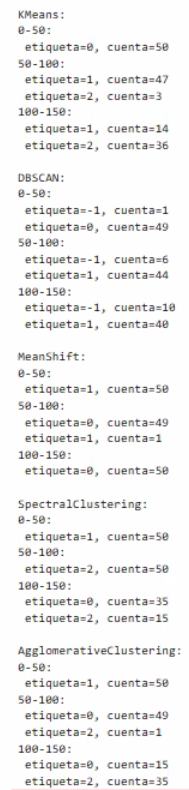